In [1]:
from iminuit import Minuit, cost
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
# from tiling_disk_plots import coordinates_plot
import tiling_disk_plots as tdp
import tiling_disk_utils as tdu
import tiling_disk_optim as optim
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("talk")
%matplotlib inline

# Steel

### Data Import

In [2]:
steel_vac = tdu.read_single_measurement('measurements/vac', '20211215_steel_60mbar.txt')
steel_vac_pt = tdu.point_table(steel_vac)
steel_novac = tdu.read_single_measurement('measurements/vac', '20211215_steel_1000mbar.txt')
steel_novac_pt = tdu.point_table(steel_novac)

In [4]:
steel_novac_pt.head(5)

,hex_nr,point,unix_time,x,y,z_mean,z_measurement_error
0,1,1,1.639580e+09,4.20,4.24,-156.391818,0.010316
1,1,2,1.639580e+09,3.36,12.56,-156.396462,0.009305
2,1,3,1.639580e+09,9.19,9.19,-156.406692,0.009572
3,1,4,1.639580e+09,12.56,3.36,-156.424538,0.010683
4,1,5,1.639580e+09,19.32,5.18,-156.388308,0.012728


### Data

In [5]:
steel_diff_vac_novac = tdu.combine_mean_measurements(steel_vac_pt, steel_novac_pt)

In [6]:
steel_diff_vac_novac.z_mean.describe()

count    60.000000
mean     -0.017106
std       0.007498
min      -0.032231
25%      -0.021423
50%      -0.017269
75%      -0.013115
max       0.001462
Name: z_mean, dtype: float64

(-35.0, 35.0)

posx and posy should be finite values


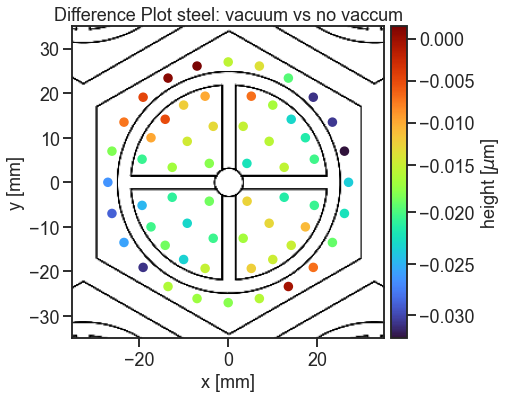

In [7]:
%matplotlib inline
s_min, s_mean, s_max = tdu.calc_min_mean_max(steel_diff_vac_novac)
fig, ax = tdp.full_hexagon_plot(steel_diff_vac_novac,
                             mode=("z_mean"),size=8**2,
                             cbar_norm=(s_min, s_mean, s_max),
                             cmap="turbo",
                             title='Difference Plot steel: vacuum vs no vaccum',
                             figsize=(6,6))
ax.set_xlim(-35,35)
ax.set_ylim(-35,35)

In [8]:
steel_diff_vac_novac.z_mean.describe()


count    60.000000
mean     -0.017106
std       0.007498
min      -0.032231
25%      -0.021423
50%      -0.017269
75%      -0.013115
max       0.001462
Name: z_mean, dtype: float64

In [9]:
steel_diff_vac_novac.z_mean = tdu.convert_mm_to_microns(steel_diff_vac_novac.z_mean)
steel_diff_vac_novac.z_measurement_error = tdu.convert_mm_to_microns(steel_diff_vac_novac.z_measurement_error)
steel_diff_vac_novac = tdu.calc_normalize_value(steel_diff_vac_novac, mode='z_mean')

In [10]:
steel_diff_vac_novac.head(10)

,hex_nr,point,unix_time,x,y,z_mean,z_measurement_error,z_mean_norm
0,1,1,1.639580e+09,4.20,4.24,-22.272727,13.858068,-0.689135
1,1,2,1.639580e+09,3.36,12.56,-15.307692,13.385408,0.239826
2,1,3,1.639580e+09,9.19,9.19,-15.923077,12.755761,0.157749
3,1,4,1.639580e+09,12.56,3.36,-15.538462,15.671216,0.209047
4,1,5,1.639580e+09,19.32,5.18,-20.307692,18.522319,-0.427049
5,1,6,1.639580e+09,17.32,10.00,-21.538462,17.415909,-0.591202
6,1,7,1.639580e+09,14.14,14.14,-23.076923,13.846559,-0.796394
7,1,8,1.639580e+09,10.00,17.32,-16.923077,15.420323,0.024374
8,1,9,1.639580e+09,5.18,19.32,-7.000000,22.273271,1.347864
9,1,10,1.639580e+09,-5.18,19.32,-9.923077,15.012794,0.957999


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

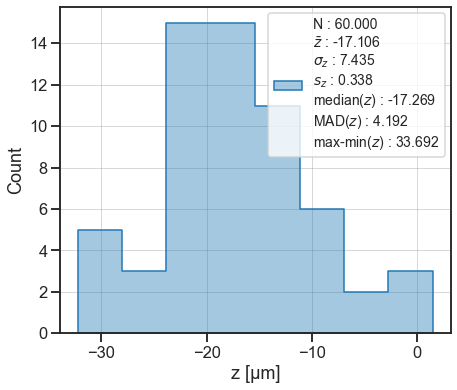

In [11]:
tdp.ts_hist(steel_diff_vac_novac, mode='z_mean')

In [12]:
tdp.ts_fit_hist(steel_diff_vac_novac,mode='z_mean', fit_window= (-40,20), fit_start_param=[10,-10,6])
#TODo: plotte nur da wo auch bins sind, sonst ist \sqrt(0) = 0

TypeError: ts_fit_hist() got an unexpected keyword argument 'fit_window'

## Quadratic Model

In [ ]:
steel_diff_vac_novac.keys()

Index(['hex_nr', 'point', 'unix_time', 'x', 'y', 'z_mean',
       'z_measurement_error', 'z_mean_norm'],
      dtype='object')

In [ ]:
X = steel_diff_vac_novac["x"]
Y = steel_diff_vac_novac["y"]
Z = steel_diff_vac_novac["z_mean"]
dz = steel_diff_vac_novac["z_measurement_error"]

In [ ]:
cost_fun = optim.get_quad_cost_fun(X,Y,Z,dz)
m_quad = Minuit(cost_fun, a=0, b=0,c=0,d=0,e=0, z_0=0.018)
m_quad.migrad()

C:\Users\Domin\AppData\Local\Temp/ipykernel_25108/2109639403.py:3: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_quad.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.946                      │              Nfcn = 137              │
│ EDM = 6.83e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.05   │   0.14    │            │            │         │         │       │
│ 1 │ b    │   0.09    │   0.13    │            │            │         │         │       │
│ 2 │ c    │  -0.029   │   0.010   │            │            │         │         │       │
│ 3 │ d    │  -0.011   │   0.010   │            │            │         │         │       │
│ 4 │ e    │   0.010   │   0.009   │            │            │         │         │       │
│ 5 │ z_0  │    -17    │     4     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │         a         b         c         d         e       z_0 │
├─────┼─────────────────────────────────────────────────────────────┤
│   a │    0.0188 -0.000249 -9.22e-05  0.000164  4.89e-05    -0.029 │
│   b │ -0.000249    0.0164   9.7e-05 -3.71e-05  -0.00014    0.0252 │
│   c │ -9.22e-05   9.7e-05  0.000109 -7.85e-06 -2.08e-06   0.00186 │
│   d │  0.000164 -3.71e-05 -7.85e-06  0.000107  3.09e-05   -0.0292 │
│   e │  4.89e-05  -0.00014 -2.08e-06  3.09e-05  8.96e-05   -0.0275 │
│ z_0 │    -0.029    0.0252   0.00186   -0.0292   -0.0275      16.3 │
└─────┴─────────────────────────────────────────────────────────────┘

In [ ]:
m_quad.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.946                      │              Nfcn = 521              │
│ EDM = 6.83e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.05   │   0.14    │   -0.14    │    0.14    │         │         │       │
│ 1 │ b    │   0.09    │   0.13    │   -0.13    │    0.13    │         │         │       │
│ 2 │ c    │  -0.029   │   0.010   │   -0.010   │   0.010    │         │         │       │
│ 3 │ d    │  -0.011   │   0.010   │   -0.010   │   0.010    │         │         │       │
│ 4 │ e    │   0.010   │   0.009   │   -0.009   │   0.009    │         │         │       │
│ 5 │ z_0  │    -17    │     4     │     -4     │     4      │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │           d           │           e           │          z_0          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.14   │   0.14    │   -0.13   │   0.13    │   -0.01   │   0.01    │   -0.01   │   0.01    │  -0.009   │   0.009   │    -4     │     4     │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │         a         b         c         d         e       z_0 │
├─────┼─────────────────────────────────────────────────────────────┤
│   a │    0.0188 -0.000249 -9.22e-05  0.000164  4.89e-05    -0.029 │
│   b │ -0.000249    0.0164   9.7e-05 -3.71e-05  -0.00014    0.0252 │
│   c │ -9.22e-05   9.7e-05  0.000109 -7.85e-06 -2.08e-06   0.00186 │
│   d │  0.000164 -3.71e-05 -7.85e-06  0.000107  3.09e-05   -0.0292 │
│   e │  4.89e-05  -0.00014 -2.08e-06  3.09e-05  8.96e-05   -0.0275 │
│ z_0 │    -0.029    0.0252   0.00186   -0.0292   -0.0275      16.3 │
└─────┴─────────────────────────────────────────────────────────────┘

### Plot plane result

In [ ]:
m_dict = m_quad.values.to_dict()
m_d_err = m_quad.errors.to_dict()

In [ ]:
m_dict_p_sig = {}
m_dict_n_sig = {}
for key in m_dict.keys():
    m_dict_p_sig[key] = m_dict[key] + m_d_err[key]
    m_dict_n_sig[key] = m_dict[key] - m_d_err[key]

0.05455778444121842


NameError: name 'fit_surface_plot' is not defined

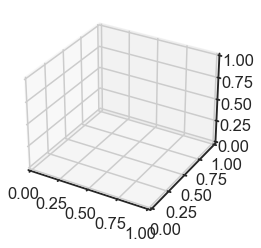

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

print(optim.chi_sq_ndof(m_quad, X))
# plt.hold(True)
Z_quad_p = optim.quadratic_model(X,Y, **m_dict_p_sig)
Z_quad_n = optim.quadratic_model(X,Y, **m_dict_n_sig)

fit_surface_plot(ax, X, Y, Z_quad_p, show_data=True, data=steel_diff_vac_novac)
fit_surface_plot(ax, X, Y, Z_quad_n, show_data=True, data=steel_diff_vac_novac)